<a href="https://colab.research.google.com/github/victornator25/Optics-_Course_AgoDic_2023/blob/main/Prac2_Optics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Leer los datos de las tres hojas del archivo XLSX
archivo_xlsx = 'Datos_prac_2.xlsx'  # Reemplaza 'tu_archivo.xlsx' con la ubicación de tu archivo XLSX

# Leer cada hoja en un DataFrame
df1 = pd.read_excel(archivo_xlsx, sheet_name='OP1')
df2 = pd.read_excel(archivo_xlsx, sheet_name='OP2')
df3 = pd.read_excel(archivo_xlsx, sheet_name='OP3')
df = pd.concat([df1, df2, df3], axis=1)


df.reset_index(drop=True, inplace=True)

# Ahora tienes un solo DataFrame con las columnas concatenadas
print(df)


    Paso_1  Voltaje_1  Paso_2  Voltaje_2  Paso_3  Voltaje_3
0      0.0      8.240       0      8.320     0.0       8.32
1      1.0      8.240       1      8.320     1.0       8.32
2      2.0      8.240       2      8.320     2.0       8.32
3      3.0      8.240       3      8.320     3.0       8.32
4      4.0      7.750       4      8.110     4.0       8.00
5      5.0      7.110       5      7.610     5.0       7.80
6      6.0      6.500       6      7.110     6.0       7.67
7      7.0      5.770       7      6.580     7.0       7.45
8      8.0      5.200       8      6.120     8.0       7.09
9      9.0      4.560       9      5.550     9.0       6.85
10    10.0      3.800      10      5.430    10.0       6.47
11    11.0      3.550      11      4.810    11.0       6.31
12    12.0      3.020      12      4.390    12.0       5.96
13    13.0      2.340      13      4.010    13.0       5.80
14    14.0      2.220      14      3.570    14.0       5.44
15    15.0      1.790      15      3.270

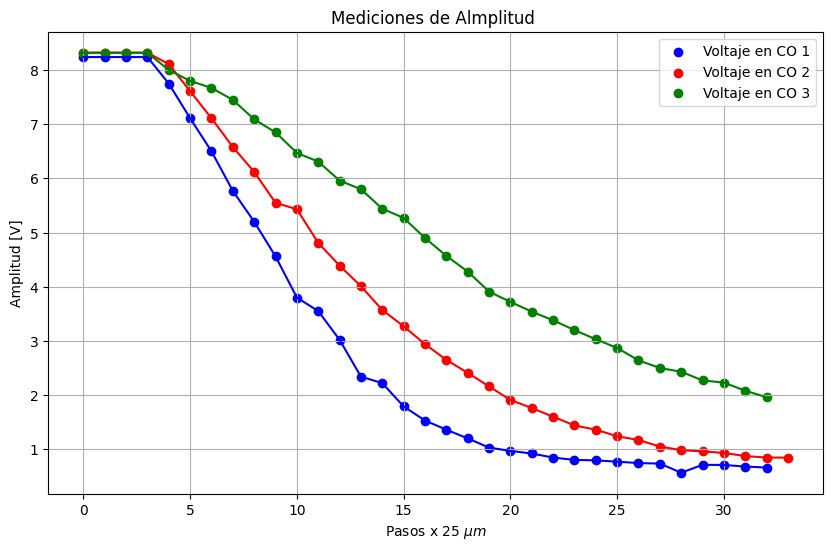

In [2]:
# Crear una figura de dispersión con tres subgráficos
plt.figure(figsize=(10, 6))  # Tamaño de la figura

# Subgráfico 1
plt.scatter(df['Paso_1'], df['Voltaje_1'], label='Voltaje en CO 1', color='blue')
plt.plot(df['Paso_1'], df['Voltaje_1'], color='blue')
# Subgráfico 2
plt.scatter(df['Paso_2'], df['Voltaje_2'], label='Voltaje en CO 2', color='red')
plt.plot(df['Paso_2'], df['Voltaje_2'], color='red')
# Subgráfico 3
plt.scatter(df['Paso_3'], df['Voltaje_3'], label='Voltaje en CO 3', color='green')
plt.plot(df['Paso_3'], df['Voltaje_3'], color='green')
# Personaliza el gráfico
plt.title('Mediciones de Almplitud ')
plt.xlabel('Pasos x 25 $ \mu m$')
plt.ylabel('Amplitud [V]')
plt.legend()
plt.grid(True)
# Mostrar el gráfico
plt.show()

In [3]:
df = df.iloc[3:]

# Reinicia el índice desde cero
df.reset_index(drop=True, inplace=True)
df = df.dropna()
#df


In [4]:
from scipy.optimize import curve_fit

# Definir la función exponencial que queremos ajustar
def funcion_exponencial(x, a, b, c):
    return a * np.exp(-b * x) + c

# Generar datos de ejemplo (sustituye esto con tus datos reales)
x = df.index
x_fit = np.arange(0, 40, 1000)
y_1 = df['Voltaje_1']

# Realizar el ajuste de curva
ajuste_1, matriz_cov_1 = curve_fit(funcion_exponencial, x_fit, y_1)

# Obtener los parámetros ajustados
a_opt, b_opt, c_opt = ajuste_1



/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


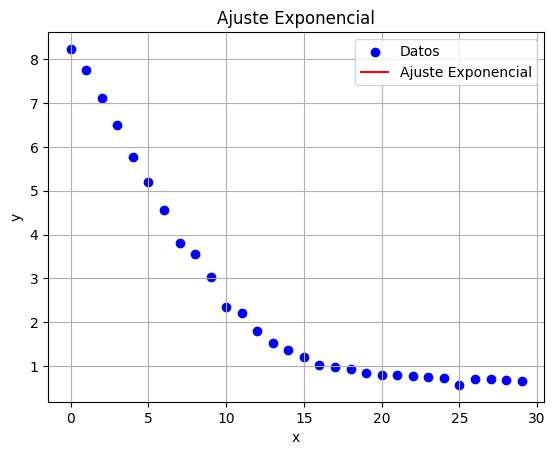

Parámetros ajustados:
a = 102.11121164523139
b = 1.0
c = -99.54854497856353


In [5]:
plt.scatter(x, y_1, label='Datos', color='b')
plt.plot(x_fit, funcion_exponencial(x_fit, a_opt, b_opt, c_opt), label='Ajuste Exponencial', color='r')

# Personalizar el gráfico
plt.title('Ajuste Exponencial')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

# Imprimir los parámetros ajustados
print("Parámetros ajustados:")
print("a =", a_opt)
print("b =", b_opt)
print("c =", c_opt)

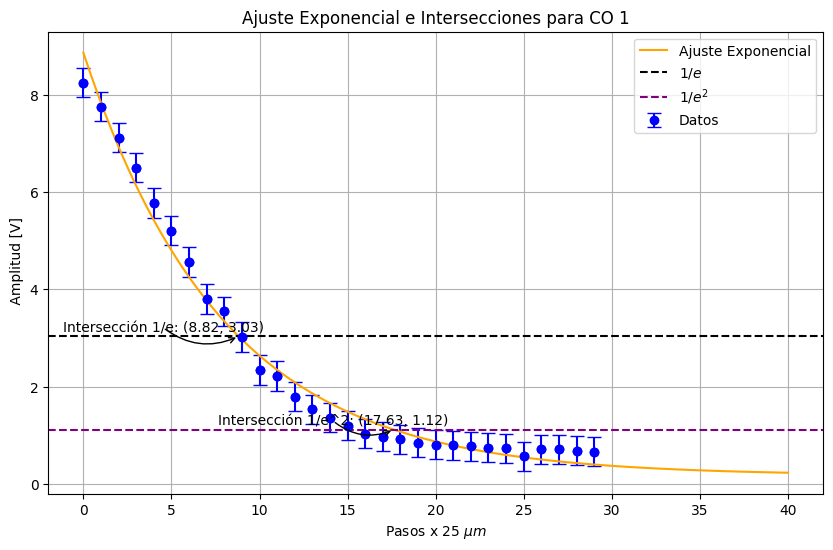

Parámetros ajustados:
a = 102.11121164523139
b = 1.0
c = -99.54854497856353


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Definir la función exponencial que queremos ajustar
def funcion_exponencial(x, a, b, c):
    return a * np.exp(-b * x) + c

# Generar datos de ejemplo (sustituye esto con tus datos reales)
# Supongamos que tienes un DataFrame 'df' con las columnas 'Voltaje_1' y 'Voltaje_2'
x = df.index
y_1 = df['Voltaje_1']
y_2 = df['Voltaje_2']
y_3 = df['Voltaje_3']

# Realizar el ajuste de curva
ajuste_1, matriz_cov_1 = curve_fit(funcion_exponencial, x, y_1)
ajuste_2, matriz_cov_2 = curve_fit(funcion_exponencial, x, y_2)
ajuste_3, matriz_cov_3 = curve_fit(funcion_exponencial, x, y_3)

# Obtener los parámetros ajustados
a_opt_1, b_opt_1, c_opt_1 = ajuste_1
a_opt_2, b_opt_2, c_opt_2 = ajuste_2
a_opt_3, b_opt_3, c_opt_3 = ajuste_3

# Funciones para calcular 1/e y 1/e^2
def uno_e(y):
    return max(y) / np.e

def uno_e_c(y):
    return max(y) / (np.e ** 2)



######
# Encontrar las coordenadas de intersección
from scipy.optimize import fsolve

x_interseccion_1_e = fsolve(lambda x: funcion_exponencial(x, a_opt_1, b_opt_1, c_opt_1) - uno_e(y_1), 0)
x_interseccion_1_e_c = fsolve(lambda x: funcion_exponencial(x, a_opt_1, b_opt_1, c_opt_1) - uno_e_c(y_1), 0)

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))

# Scatter plot de los datos
plt.scatter(x, y_1, color='b')
# Scatter plot de los datos con barras de error de ±0.3
plt.errorbar(x, y_1, yerr=0.3, label='Datos', fmt='bo', capsize=5)

# Gráfico del ajuste exponencial
x_fit = np.linspace(min(x), 40, 100)  # Rango extendido hasta 40 para el ajuste
plt.plot(x_fit, funcion_exponencial(x_fit, a_opt_1, b_opt_1, c_opt_1), label='Ajuste Exponencial', color='orange')

# Gráfica de las líneas horizontales 1/e y 1/e^2
plt.axhline(y=uno_e(y_1), color='k', linestyle='--', label='$1/e$')
plt.axhline(y=uno_e_c(y_1), color='purple', linestyle='--', label='$1/e^2$')

# Personalizar el gráfico
plt.title('Ajuste Exponencial e Intersecciones para CO 1')
plt.xlabel('Pasos x 25 $ \mu m$')
plt.ylabel(' Amplitud [V]')
plt.legend()

# Etiquetas de los puntos de intersección
plt.annotate(f'Intersección 1/e: ({x_interseccion_1_e[0]:.2f}, {uno_e(y_1):.2f})',
             xy=(x_interseccion_1_e[0], uno_e(y_1)), xytext=(x_interseccion_1_e[0] - 10, uno_e(y_1) + 0.1),
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.3"))

plt.annotate(f'Intersección 1/e^2: ({x_interseccion_1_e_c[0]:.2f}, {uno_e_c(y_1):.2f})',
             xy=(x_interseccion_1_e_c[0], uno_e_c(y_1)), xytext=(x_interseccion_1_e_c[0] - 10, uno_e_c(y_1) + 0.1),
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.3"))

# Mostrar el gráfico
plt.grid(True)
plt.show()

# Imprimir los parámetros ajustados
print("Parámetros ajustados:")
print("a =", a_opt)
print("b =", b_opt)
print("c =", c_opt)

<ipython-input-7-9f08d24646f2>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.errorbar(x, y_2, yerr=0.3, color='r', label='Datos', fmt='bo', capsize=5)


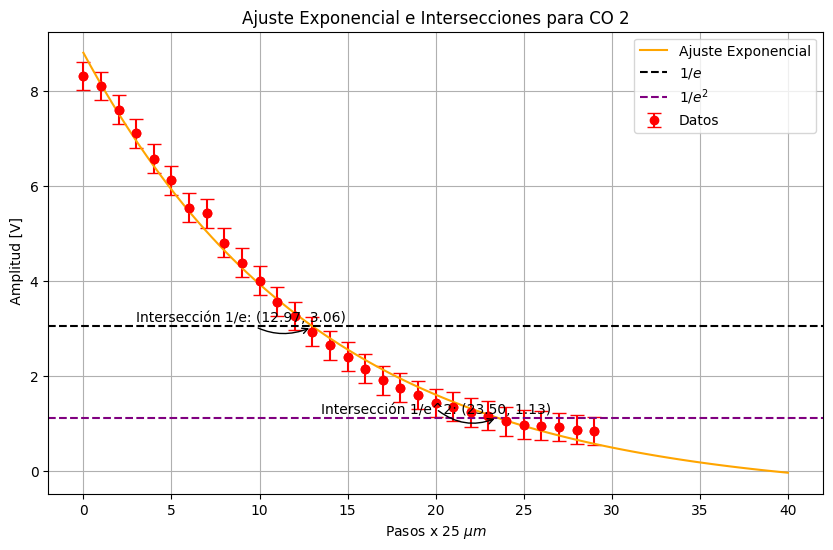

Parámetros ajustados:
a = 102.11121164523139
b = 1.0
c = -99.54854497856353


In [7]:
x_interseccion_1_e = fsolve(lambda x: funcion_exponencial(x, a_opt_2, b_opt_2, c_opt_2) - uno_e(y_2), 0)
x_interseccion_1_e_c = fsolve(lambda x: funcion_exponencial(x, a_opt_2, b_opt_2, c_opt_2) - uno_e_c(y_2), 0)

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))

# Scatter plot de los datos
plt.scatter(x, y_2, color='r')
# Scatter plot de los datos con barras de error de ±0.3
plt.errorbar(x, y_2, yerr=0.3, color='r', label='Datos', fmt='bo', capsize=5)

# Gráfico del ajuste exponencial
x_fit = np.linspace(min(x), 40, 100)  # Rango extendido hasta 40 para el ajuste
plt.plot(x_fit, funcion_exponencial(x_fit, a_opt_2, b_opt_2, c_opt_2), label='Ajuste Exponencial', color='orange')

# Gráfica de las líneas horizontales 1/e y 1/e^2
plt.axhline(y=uno_e(y_2), color='k', linestyle='--', label='$1/e$')
plt.axhline(y=uno_e_c(y_2), color='purple', linestyle='--', label='$1/e^2$')

# Personalizar el gráfico
plt.title('Ajuste Exponencial e Intersecciones para CO 2')
plt.xlabel('Pasos x 25 $ \mu m$')
plt.ylabel(' Amplitud [V]')
plt.legend()

# Etiquetas de los puntos de intersección
plt.annotate(f'Intersección 1/e: ({x_interseccion_1_e[0]:.2f}, {uno_e(y_2):.2f})',
             xy=(x_interseccion_1_e[0], uno_e(y_1)), xytext=(x_interseccion_1_e[0] - 10, uno_e(y_2) + 0.1),
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.3"))

plt.annotate(f'Intersección 1/e^2: ({x_interseccion_1_e_c[0]:.2f}, {uno_e_c(y_2):.2f})',
             xy=(x_interseccion_1_e_c[0], uno_e_c(y_2)), xytext=(x_interseccion_1_e_c[0] - 10, uno_e_c(y_2) + 0.1),
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.3"))

# Mostrar el gráfico
plt.grid(True)
plt.show()

# Imprimir los parámetros ajustados
print("Parámetros ajustados:")
print("a =", a_opt)
print("b =", b_opt)
print("c =", c_opt)

<ipython-input-8-6b57da60d937>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.errorbar(x, y_3, yerr=0.3, color='g', label='Datos', fmt='bo', capsize=5)


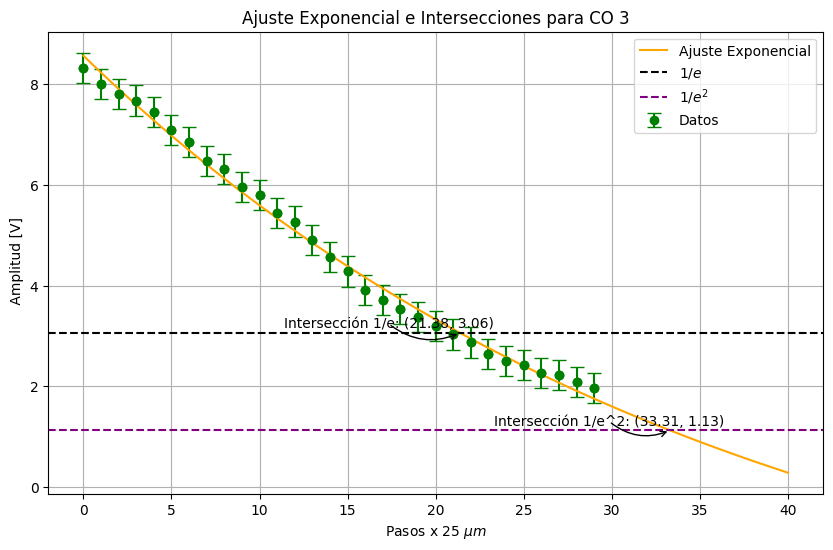

Parámetros ajustados:
a = 102.11121164523139
b = 1.0
c = -99.54854497856353


In [8]:
x_interseccion_1_e = fsolve(lambda x: funcion_exponencial(x, a_opt_3, b_opt_3, c_opt_3) - uno_e(y_3), 0)
x_interseccion_1_e_c = fsolve(lambda x: funcion_exponencial(x, a_opt_3, b_opt_3, c_opt_3) - uno_e_c(y_3), 0)

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))

# Scatter plot de los datos
plt.scatter(x, y_3, color='g')
# Scatter plot de los datos con barras de error de ±0.3
plt.errorbar(x, y_3, yerr=0.3, color='g', label='Datos', fmt='bo', capsize=5)

# Gráfico del ajuste exponencial
x_fit = np.linspace(min(x), 40, 100)  # Rango extendido hasta 40 para el ajuste
plt.plot(x_fit, funcion_exponencial(x_fit, a_opt_3, b_opt_3, c_opt_3), label='Ajuste Exponencial', color='orange')

# Gráfica de las líneas horizontales 1/e y 1/e^2
plt.axhline(y=uno_e(y_3), color='k', linestyle='--', label='$1/e$')
plt.axhline(y=uno_e_c(y_3), color='purple', linestyle='--', label='$1/e^2$')

# Personalizar el gráfico
plt.title('Ajuste Exponencial e Intersecciones para CO 3')
plt.xlabel('Pasos x 25 $ \mu m$')
plt.ylabel(' Amplitud [V]')
plt.legend()

# Etiquetas de los puntos de intersección
plt.annotate(f'Intersección 1/e: ({x_interseccion_1_e[0]:.2f}, {uno_e(y_3):.2f})',
             xy=(x_interseccion_1_e[0], uno_e(y_3)), xytext=(x_interseccion_1_e[0] - 10, uno_e(y_3) + 0.1),
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.3"))

plt.annotate(f'Intersección 1/e^2: ({x_interseccion_1_e_c[0]:.2f}, {uno_e_c(y_3):.2f})',
             xy=(x_interseccion_1_e_c[0], uno_e_c(y_3)), xytext=(x_interseccion_1_e_c[0] - 10, uno_e_c(y_3) + 0.1),
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.3"))

#plt.gca().set_aspect('equal', adjustable='box')#misma escala de ejes
# Mostrar el gráfico
plt.grid(True)
plt.show()

# Imprimir los parámetros ajustados
print("Parámetros ajustados:")
print("a =", a_opt)
print("b =", b_opt)
print("c =", c_opt)

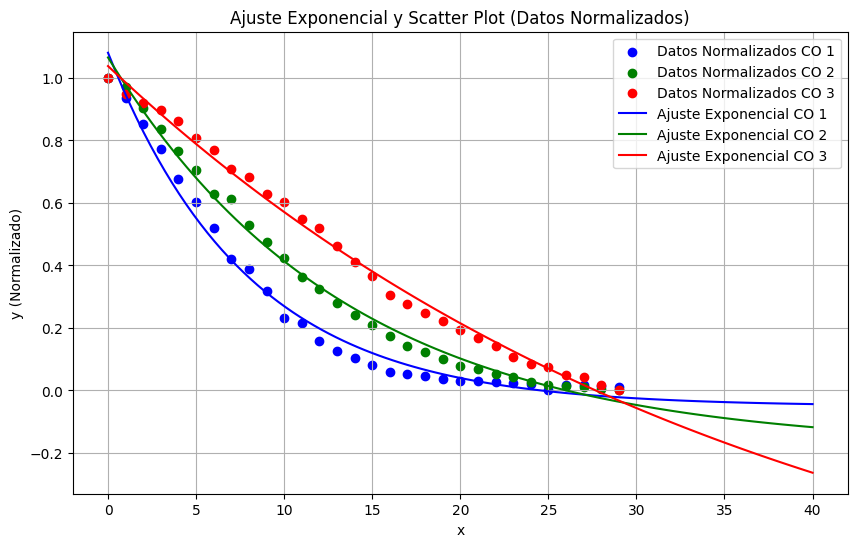

Parámetros ajustados 1:
a = 1.1316705772136386
b = 0.12610682563600428
c = -0.050958511281303506
Parámetros ajustados 2:
a = 1.2480802703402418
b = 0.07388066458279689
c = -0.18250132207497224
Parámetros ajustados 3:
a = 1.9652720712182883
b = 0.02712615928203106
c = -0.927290443365951


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Definir la función exponencial que queremos ajustar
def funcion_exponencial(x, a, b, c):
    return a * np.exp(-b * x) + c

# Generar datos de ejemplo (sustituye esto con tus datos reales)
# Supongamos que tienes un DataFrame 'df' con las columnas 'Voltaje_1', 'Voltaje_2' y 'Voltaje_3'
x = df.index
y_1 = df['Voltaje_1']
y_2 = df['Voltaje_2']
y_3 = df['Voltaje_3']

# Normalizar los datos
y_min_1 = np.min(y_1)
y_max_1 = np.max(y_1)
y_1_norm = (y_1 - y_min_1) / (y_max_1 - y_min_1)

y_min_2 = np.min(y_2)
y_max_2 = np.max(y_2)
y_2_norm = (y_2 - y_min_2) / (y_max_2 - y_min_2)

y_min_3 = np.min(y_3)
y_max_3 = np.max(y_3)
y_3_norm = (y_3 - y_min_3) / (y_max_3 - y_min_3)

# Realizar el ajuste de curva en los datos normalizados y obtener los parámetros ajustados
ajuste_1, matriz_cov_1 = curve_fit(funcion_exponencial, x, y_1_norm)
a_opt_1, b_opt_1, c_opt_1 = ajuste_1

ajuste_2, matriz_cov_2 = curve_fit(funcion_exponencial, x, y_2_norm)
a_opt_2, b_opt_2, c_opt_2 = ajuste_2

ajuste_3, matriz_cov_3 = curve_fit(funcion_exponencial, x, y_3_norm)
a_opt_3, b_opt_3, c_opt_3 = ajuste_3

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))

# Scatter plot de los datos normalizados
plt.scatter(x, y_1_norm, color='b', label='Datos Normalizados CO 1')
plt.scatter(x, y_2_norm, color='g', label='Datos Normalizados CO 2')
plt.scatter(x, y_3_norm, color='r', label='Datos Normalizados CO 3')

# Gráfico del ajuste exponencial en los datos normalizados
x_fit = np.linspace(min(x), 40, 100)  # Rango extendido hasta 40 para el ajuste
plt.plot(x_fit, funcion_exponencial(x_fit, a_opt_1, b_opt_1, c_opt_1), label='Ajuste Exponencial CO 1', color='b')
plt.plot(x_fit, funcion_exponencial(x_fit, a_opt_2, b_opt_2, c_opt_2), label='Ajuste Exponencial CO 2', color='g')
plt.plot(x_fit, funcion_exponencial(x_fit, a_opt_3, b_opt_3, c_opt_3), label='Ajuste Exponencial CO 3', color='r')

# Personalizar el gráfico
plt.title('Ajuste Exponencial y Scatter Plot (Datos Normalizados)')
plt.xlabel('x')
plt.ylabel('y (Normalizado)')
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

# Imprimir los parámetros ajustados
print("Parámetros ajustados 1:")
print("a =", a_opt_1)
print("b =", b_opt_1)
print("c =", c_opt_1)

print("Parámetros ajustados 2:")
print("a =", a_opt_2)
print("b =", b_opt_2)
print("c =", c_opt_2)

print("Parámetros ajustados 3:")
print("a =", a_opt_3)
print("b =", b_opt_3)
print("c =", c_opt_3)


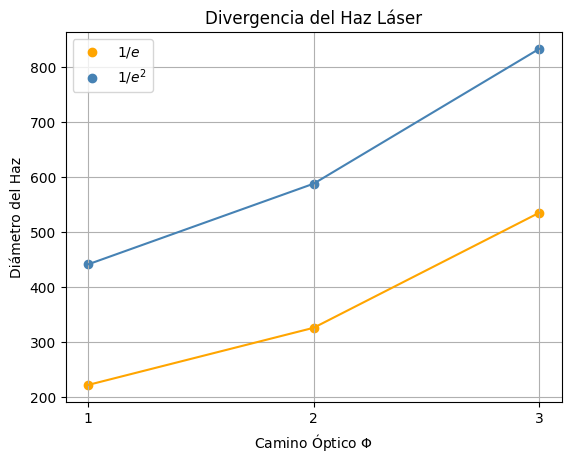

In [22]:
import matplotlib.pyplot as plt

# Datos
x = [1, 2, 3]
y_c1 = [221.25, 325.25, 534.5]
y_c2 = [440.75, 587.5, 832.75]

# Crear un gráfico de dispersión
plt.scatter(x, y_c1, label='$1/e$', color='orange')
plt.plot(x, y_c1, color='orange')
plt.scatter(x, y_c2, label='$1/e^2$', color='steelblue')
plt.plot(x, y_c2, color='steelblue')

# Etiquetas de ejes y título
plt.xlabel('Camino Óptico $\Phi$')
plt.ylabel('Diámetro del Haz')
plt.title('Divergencia del Haz Láser')

# Mostrar leyenda
plt.legend()

# Configurar el eje x para mostrar valores enteros
plt.xticks(x)

# Mostrar el gráfico
plt.grid(True)
plt.show()